<b>Описание проекта:</b>

Фермер планирует закупить молочных коров в свою ферму. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям. 

Требуется разработка модели машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. 

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

<b>Описание предоставленных данных:</b>

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<b>Задачи исследования</b>

Создать модель для отбора буренок по следующим критериям.
1) Возможный удой коровы (признак Удой в кг)

2) молоко должно быть вкусным

<b>План исследования</b>
- Изучить предоставленный данные
- Провести предобработку данных
- Провести исследовательский анализ
- Провести коррелиационный анализ признаков
- Выполнить задачу регрессии
- Выполнить задачу классификации

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy import stats as st
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [2]:
ferma_main = pd.read_csv('Linear_models/ferma_main.csv', sep=';', header=0, decimal=',')
ferma_dad = pd.read_csv('Linear_models/ferma_dad.csv', sep=';', header=0, decimal=',')
cow_buy = pd.read_csv('Linear_models/cow_buy.csv', sep=';', header=0, decimal=',')

In [3]:
def pretty_display(df, title="Таблица"):
    styled_df = df.head(5).style \
        .set_table_styles(
            [{'selector': 'th', 'props': [('text-align', 'center')]}]
        ) \
        .set_properties(**{'text-align': 'center'}) \
        .highlight_null(color='lightgray') \
        .set_caption(title)
    
    display(styled_df)
    
pretty_display(ferma_main, "Первые 5 строк таблицы ferma_main")
pretty_display(ferma_dad, "Первые 5 строк таблицы ferma_dad")
pretty_display(cow_buy, "Первые 5 строк таблицы cow_buy")

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.200000,1743,0.890000,Вис Бик Айдиал,Равнинное,Айдиал,3.580000,3.076000,вкусно,более_2_лет
1,2,5529,12.800000,2138,0.890000,Вис Бик Айдиал,Равнинные,Соверин,3.540000,3.079000,вкусно,менее_2_лет
2,3,5810,14.000000,1854,0.885000,РефлешнСоверинг,Холмистое,Соверин,3.590000,3.074000,не вкусно,более_2_лет
3,4,5895,12.400000,2012,0.885000,РефлешнСоверинг,Холмистое,Айдиал,3.400000,3.075000,не вкусно,более_2_лет
4,5,5302,12.800000,1675,0.885000,Вис Бик Айдиал,Равнинные,Соверин,3.730000,3.073000,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.580000,3.076000,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.540000,3.081000,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.590000,3.074000,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.400000,3.061000,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.640000,3.074000,более_2_лет


<b>Описание файлов</b>

<b> - Файл ferma_main.csv содержит 12 столбцов которые можно разделить на группы по критериям. </b>

Характеристика коровы: id, Порода, порода папы_быка, Возраст.

Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).

Характеристика пастбища: Тип пастбища.

Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

<b>- Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.</b> 

Описание данных:
id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.

<b>- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.</b>
    
Описание данных:

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

##  Предобработка данных

<b>Обработка дуликатов</b>

In [4]:
def check_duplicates(df, name):
    dup_count = df.duplicated().sum()
    print(f"В {name}: {dup_count} дубликатов")
    if dup_count > 0:
        print(df[df.duplicated()].head())
    print('-' * 50)

In [5]:
ferma_main_missing_values = ferma_main.isnull().sum()
ferma_main_missing_values = ferma_main_missing_values[ferma_main_missing_values > 0].sort_values(ascending=False)
ferma_main_missing_values
check_duplicates(ferma_main, "ferma_main")
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

В ferma_main: 5 дубликатов
      id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
629  627      5970                                   14.4              1837   
630  627      5970                                   14.4              1837   
631  627      5970                                   14.4              1837   
632  627      5970                                   14.4              1837   
633  627      5970                                   14.4              1837   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
629                                  0.88  РефлешнСоверинг    Холмистое   
630                                  0.88  РефлешнСоверинг    Холмистое   
631                                  0.88  РефлешнСоверинг    Холмистое   
632                                  0.88  РефлешнСоверинг    Холмистое   
633                                  0.88  РефлешнСоверинг    Холмистое   

    порода папы_быка  Жирность,%  Белок,% Вкус 

В файле ferma_main было найдено 5 полных дубликатов, то есть все строки совпадали по значениеям. решено их удалить.

In [6]:
ferma_dad_missing_values = ferma_dad.isnull().sum()
ferma_dad_missing_values = ferma_dad_missing_values[ferma_dad_missing_values > 0].sort_values(ascending=False)
ferma_dad_missing_values
check_duplicates(ferma_main, "users_go_data")
ferma_dad = ferma_dad.drop_duplicates()

В users_go_data: 0 дубликатов
--------------------------------------------------


В файле ferma_dad дубликатов не обнаружено.

In [7]:
cow_buy_missing_values = cow_buy.isnull().sum()
cow_buy_missing_values = cow_buy_missing_values[cow_buy_missing_values > 0].sort_values(ascending=False)
cow_buy_missing_values
check_duplicates(ferma_main, "users_go_data")
cow_buy = cow_buy.drop_duplicates()

В users_go_data: 0 дубликатов
--------------------------------------------------


В файле cow_buy дубликатов не обнаружено.

In [8]:
print(ferma_main.isnull().sum())
print(ferma_dad.isnull().sum())
print(cow_buy.isnull().sum())

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
id          0
Имя Папы    0
dtype: int64
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64


Пропусков во всех трех файлах не обнаружено. 

<b>Переименование столбцов</b>

In [9]:
ferma_main.rename(columns={
    'Удой, кг': 'удой_кг',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'сырой_протеин_грамм',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Жирность,%': 'жирность_%',
    'Белок,%': 'белок_%',
    'Вкус молока': 'вкус_молока',
    'Возраст': 'возраст',
}, inplace=True)
ferma_main.head()

,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [10]:
ferma_dad.rename(columns={'Имя Папы': 'имя_папы'}, inplace=True)
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [11]:
cow_buy.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'текущая_жирность_%',
    'Текущий_уровень_белок,%': 'текущий_белок_%',
    'Возраст': 'возраст',
}, inplace=True)
cow_buy.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Решено перевести все столбцы в нижный регист.

<b>Удаление неявных дубликатов</b>

In [12]:
cols = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']
for col in cols:
    ferma_main[col] = ferma_main[col].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
    print(ferma_main[col].unique())

['вис бик айдиал' 'рефлешнсоверинг']
['равнинное' 'равнинные' 'холмистое']
['айдиал' 'соверин' 'айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


In [13]:
ferma_main['тип_пастбища'].replace({'равнинные': 'равнинное'}, inplace=True)
ferma_main['порода_папы'].replace({'айдиалл': 'айдиал'}, inplace=True)
display(ferma_main['тип_пастбища'].unique())
display(ferma_main['порода_папы'].unique())

array(['равнинное', 'холмистое'], dtype=object)

array(['айдиал', 'соверин'], dtype=object)

Обнаружено два неявных дубликата, в столбце "тип_пастбища" ('равнинное' 'равнинные') и "порода_папы" ('айдиал' 'айдиалл')

Решено их удалить.

In [14]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [15]:
cols = ['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'возраст']
for col in cols:
    cow_buy[col] = cow_buy[col].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
    print(cow_buy[col].unique())

['вис бик айдиал' 'рефлешнсоверинг']
['холмистое' 'равнинное']
['айдиал' 'соверин']
['геркулес' 'буйный' 'барин' 'соловчик']
['более_2_лет' 'менее_2_лет']


В файлах ferma_dad и cow_buy неявных дубликатов не обнаружено.

In [16]:
ferma_main.info()
cow_buy.info()
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   удой_кг              629 non-null    int64  
 2   эке                  629 non-null    float64
 3   сырой_протеин_грамм  629 non-null    int64  
 4   спо                  629 non-null    float64
 5   порода               629 non-null    object 
 6   тип_пастбища         629 non-null    object 
 7   порода_папы          629 non-null    object 
 8   жирность_%           629 non-null    float64
 9   белок_%              629 non-null    float64
 10  вкус_молока          629 non-null    object 
 11  возраст              629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column              Non-Null C

In [17]:
def convert_str_columns_to_numeric(df, columns, convert_to_int=False):
    for col in columns:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if convert_to_int:
            df[col] = df[col].astype('float64')
    return df

cols = ['эке', 'спо', 'жирность_%', 'белок_%']
ferma_main = convert_str_columns_to_numeric(ferma_main, cols, convert_to_int=True)
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   удой_кг              629 non-null    int64  
 2   эке                  629 non-null    float64
 3   сырой_протеин_грамм  629 non-null    int64  
 4   спо                  629 non-null    float64
 5   порода               629 non-null    object 
 6   тип_пастбища         629 non-null    object 
 7   порода_папы          629 non-null    object 
 8   жирность_%           629 non-null    float64
 9   белок_%              629 non-null    float64
 10  вкус_молока          629 non-null    object 
 11  возраст              629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [18]:
cols = ['текущая_жирность_%', 'текущий_белок_%']
cow_buy = convert_str_columns_to_numeric(cow_buy, cols, convert_to_int=True)
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 18
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   порода              16 non-null     object 
 1   тип_пастбища        16 non-null     object 
 2   порода_папы         16 non-null     object 
 3   имя_папы            16 non-null     object 
 4   текущая_жирность_%  16 non-null     float64
 5   текущий_белок_%     16 non-null     float64
 6   возраст             16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


<b>Промежуточный вывод по предобработке данных</b>

- Было удалено 5 явных дубликатов в файле ferma_main, все строки совпадали, видимо ошибка при сборе данных
- Также найдено 2 неявных дубликата в файле ferma_main, они были исправлены на оригинальное значение.
- Найдены 4 столбца со строковые значениями в файле ferma_main, было решено их преобразовать в числовые.
- Также найдены 2 строковые значения в файле cow_buy, аналогично они были преобразованы в числовые. 

<div style="background-color: #d4edda; color: #155724; padding: 15px;a border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>
    
Хорошее решение для приведения данных к единому формату.
    
Здорово, что оставляешь промежуточные выводы.

## Исследовательский анализ данных

In [19]:
display(ferma_main.describe())
display(ferma_main.head())

,id,удой_кг,эке,сырой_протеин_грамм,спо,жирность_%,белок_%
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


Данная таблица описывает средние и медиану по количественным признакам в файле ferma_main.

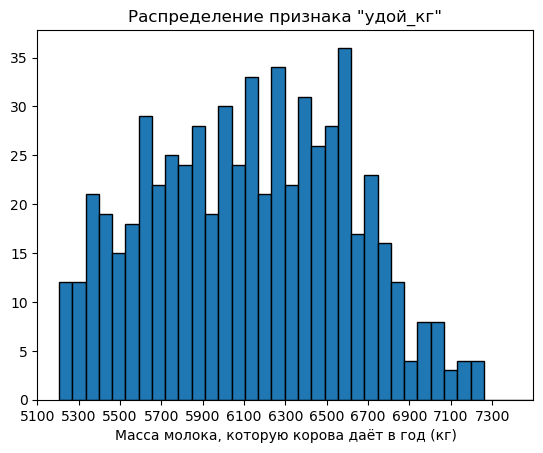

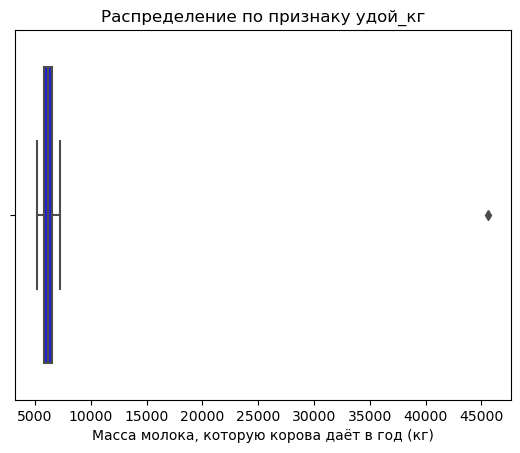

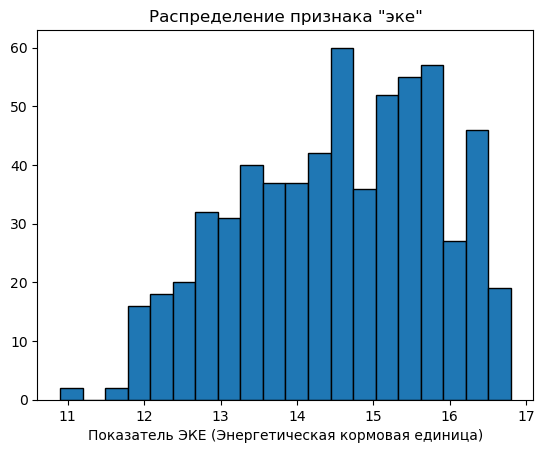

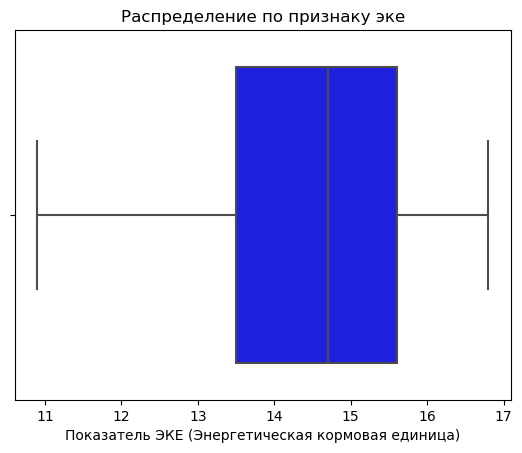

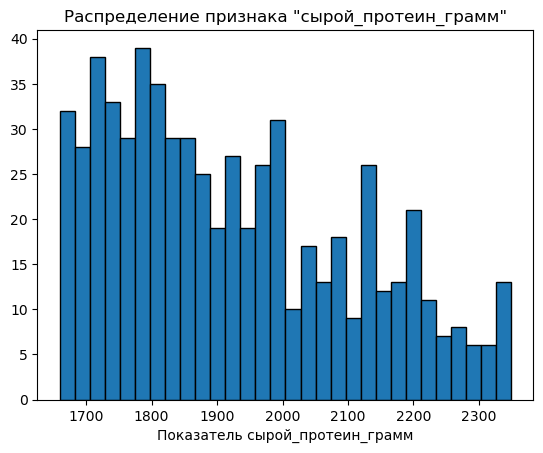

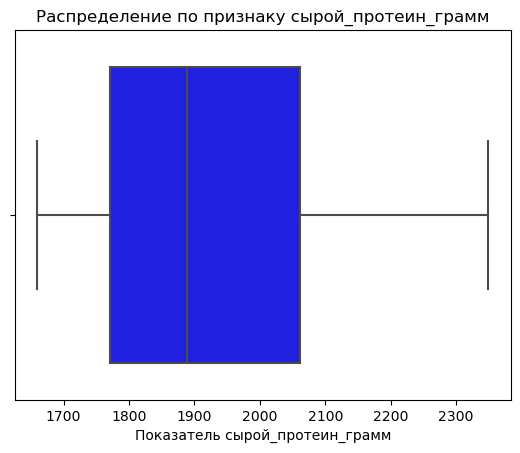

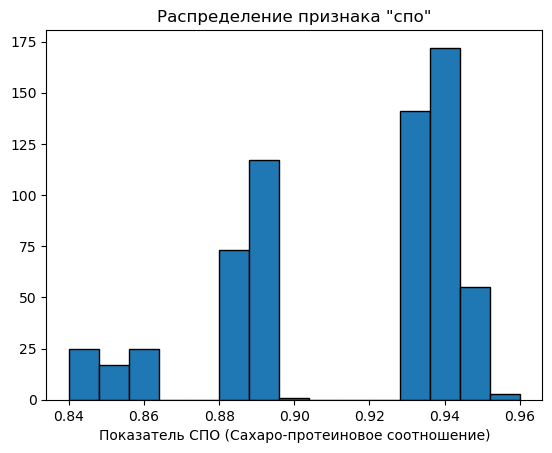

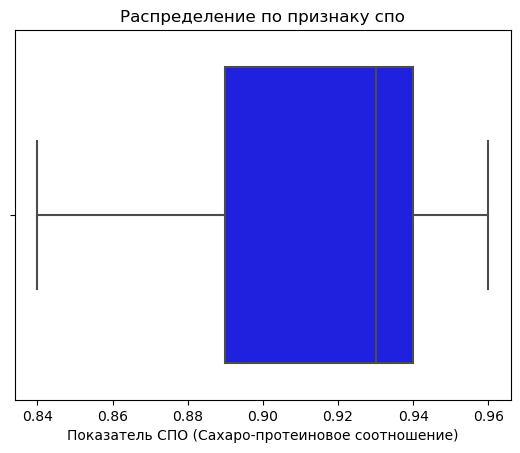

In [20]:
# Список признаков и их параметры для отрисовки
features = [
    ('удой_кг', 'Масса молока, которую корова даёт в год (кг)', 629, (5400, 7500), np.arange(5100, 7500, 200)),
    ('эке', 'Показатель ЭКЕ (Энергетическая кормовая единица)', 20, None, None),
    ('сырой_протеин_грамм', 'Показатель сырой_протеин_грамм', 30, None, None),
    ('спо', 'Показатель СПО (Сахаро-протеиновое соотношение)', 15, None, None)
]

for feature, xlabel, bins, xlim, xticks in features:
    # Гистограмма
    plt.hist(ferma_main[feature], edgecolor='black', bins=bins)
    plt.title(f'Распределение признака "{feature}"')
    plt.xlabel(xlabel)
    if xlim:
        plt.xlim(xlim)
    if xticks is not None:
        plt.xticks(xticks)
    plt.show()
    
    # Boxplot
    sns.boxplot(x=ferma_main[feature], color='blue')
    plt.title(f'Распределение по признаку {feature}')
    plt.xlabel(xlabel)
    plt.show()

In [21]:
ferma_main = ferma_main[ferma_main['удой_кг'] != 45616]
print(ferma_main['удой_кг'].max())

7222


Распределение по признаку удой в год показал наличие одного выброса (45616 кг), который видимо является результатом ошибки сбора данных. Для более объективного анализа данное значение было удалено.

Анализ числовых значений по столбцк ЭКЕ показал отсутствие каких либо аномальных выбросов. Медиана находится на уровне 14.8 единиц.

Анализ столбца "сырой_протеин_грамм" показал отсутствие выбросов и аномалий.

Показатель сырого протеина держится в отметке 0.88 - 0.94 грамм. Выбросов и аномальных значений не обнаружено.

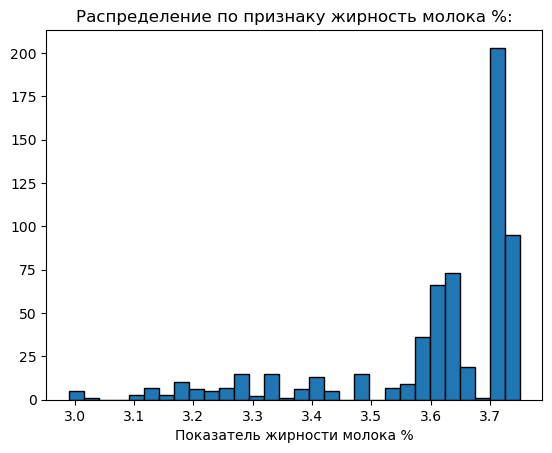

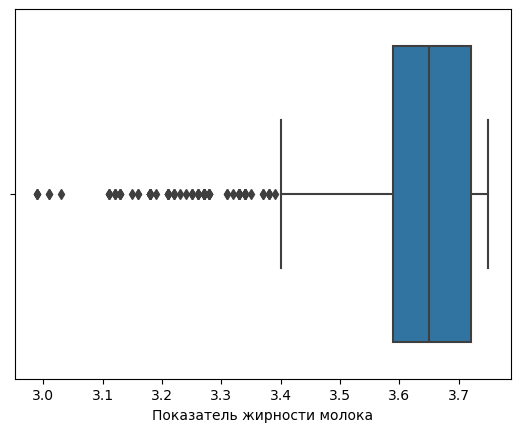

In [22]:
plt.hist(ferma_main['жирность_%'],  edgecolor='black', bins=30)
plt.title('Распределение по признаку жирность молока %:')
plt.xlabel('Показатель жирности молока %')
plt.show()

sns.boxplot(x=ferma_main['жирность_%'])
plt.xlabel('Показатель жирности молока')
plt.show()

Большинство записей по жирности молока находятся в диапазоне 3.6 - 3.7%. Тем не менее есть большое количество выбросов которые скорее всего не являются результатом ошибки. Вариативноть записей стоит оставить так как все записи в пределах 3.0 - 3.7%. Возможной причиной является разношерстность показателя ЭКЕ (Энергетическая кормовая единица).

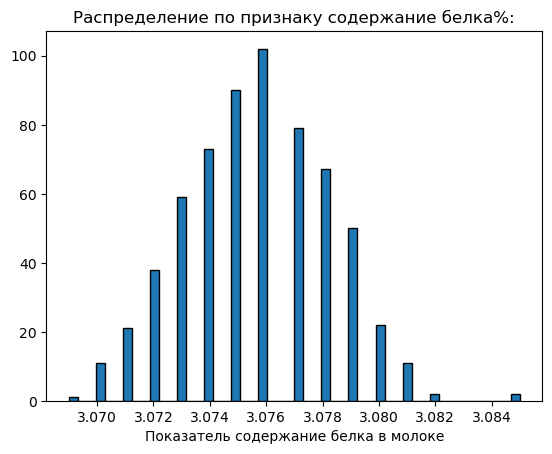

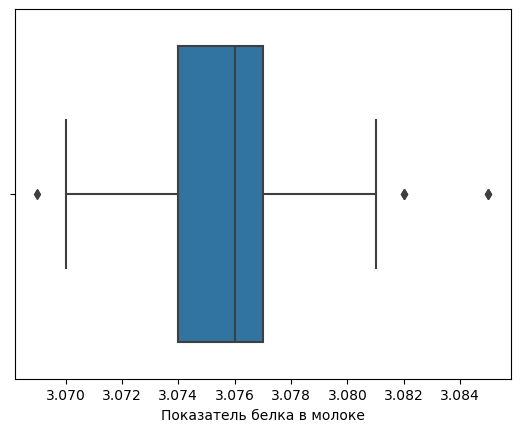

In [23]:
plt.hist(ferma_main['белок_%'],  edgecolor='black', bins=50)
plt.title('Распределение по признаку содержание белка%:')
plt.xlabel('Показатель содержание белка в молоке')
plt.show()

sns.boxplot(x=ferma_main['белок_%'])
plt.xlabel('Показатель белка в молоке')
plt.show()

Медиана по содержанию белка в молоке держится на значении 3.075%. Наличие трех выбросов не превышает значений 3.069 - 3.085%. Решено не удалять данные выбросы.

<b>Исследовательский анализ категориальных признаков</b>

In [24]:
ferma_main.head()

,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


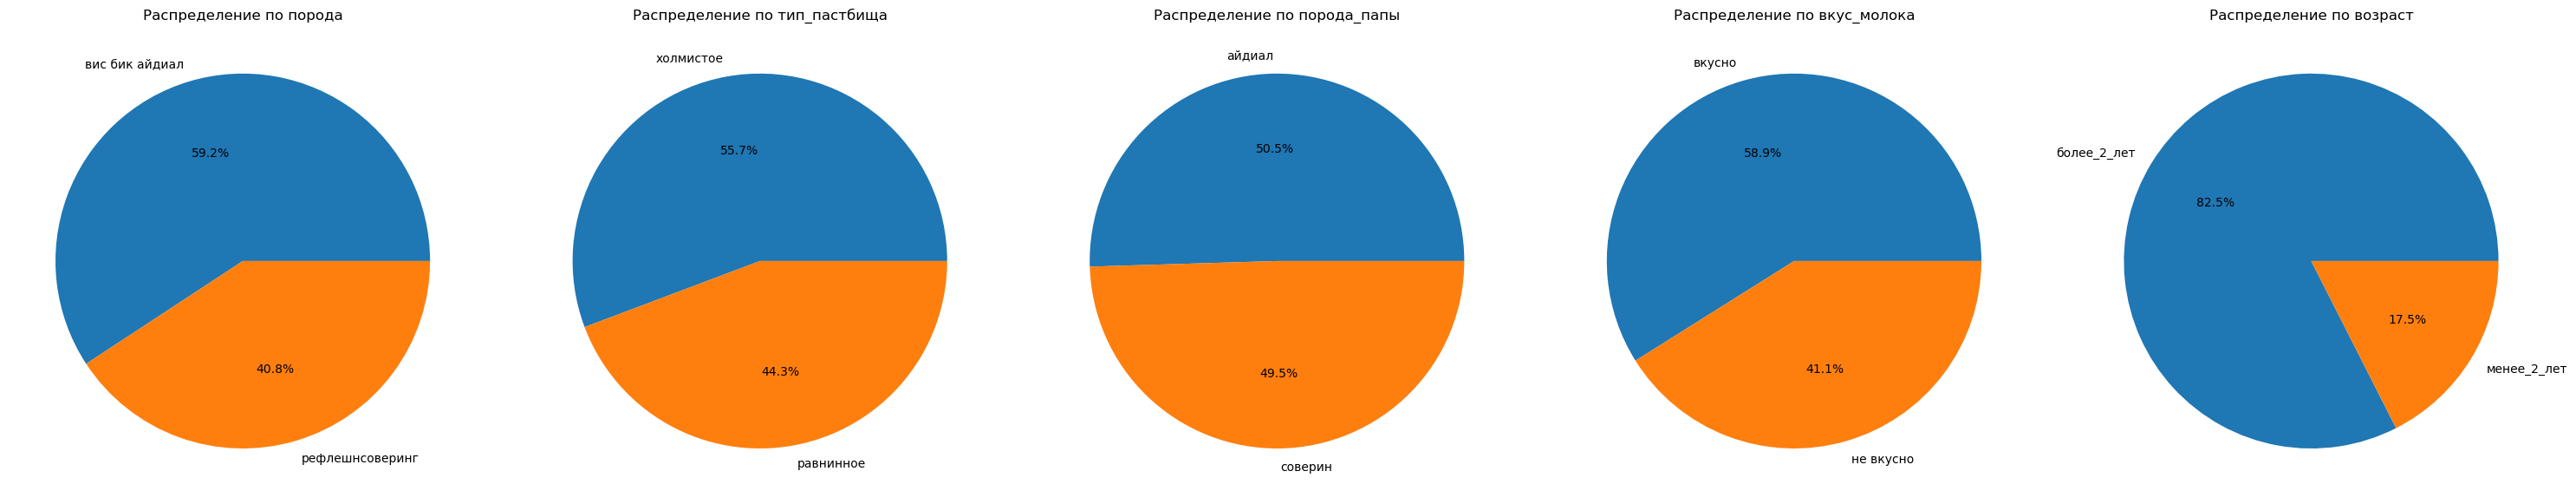

In [25]:
def plot_pie_charts(df, columns, title_prefix='Распределение по'):
    num_cols = len(columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 6))

    if num_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, columns):
        df[col].value_counts().plot.pie(autopct='%.1f%%', ax=ax)
        ax.set_ylabel('')
        ax.set_title(f'{title_prefix} {col}')

    plt.tight_layout()
    plt.show()
    
plot_pie_charts(ferma_main, [
    'порода',
    'тип_пастбища',
    'порода_папы',
    'вкус_молока',
    'возраст'
])

В столбцах категориальных признаков есть по два признака. Стоит отметить что коровы в большинстве своем (82.5%) имеют возраст более 2 лет, доля молодых буренок всего лишь 17,5%. Остальные признаки в целом имеют равнопропорцинальные значение. 

<b>Промежуточный вывод по исследовательскому анализу данных</b>

- В столбце "удой_кг" был обнаружен выброс (45616 кг) при среднем значении в 6125 кг. Для задач МО было решено удалить данный выброс.

- Остальный признаки, не имели аномальных значений и наличие выбросов не превышало 10-15%.

- Категориальные признаки имеют биноминальные характеристики, то есть вариативность ограничена двумя значениями.

В целом предоставленные данные отлично подойдкт для задач МО.

## Корреляционный анализ

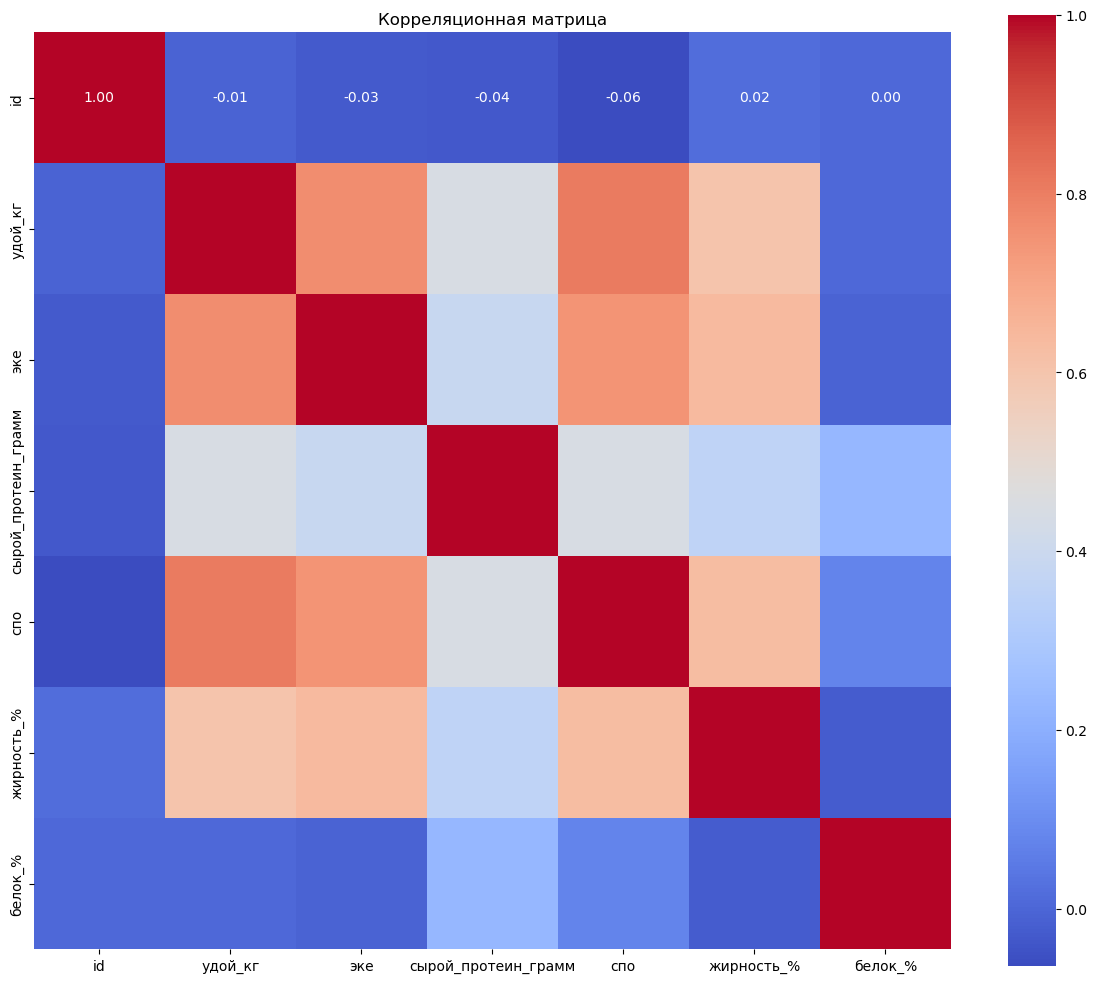

In [26]:
corr_matrix = ferma_main.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

Матрица корреляции Пирсона показа что ЭКЕ (Энергетическая кормовая единица) оказывает положительное влияние на такие признаки как: 
- Жирность_% - индекс корреляции 0.64.
- СПО (Сахаро-протеиновое соотношение) - индекс корреляции 0.75.
- Сырой протеин - индекс корреляции 0.39.
- Удой -  индекс корреляции 0.77.
То есть с увеличением ЭКЕ увеличиваются некоторые характеристики молока.

Признак "удой_кг" также сильно влияет на такие показатели как:

- Жирность_% - индекс корреляции 0.6.
- СПО (Сахаро-протеиновое соотношение) - индекс корреляции 0.81.
- Сырой протеин - индекс корреляции 0.45.

Признак "белок_%" к примеру почти не имеет корреляции с другими признаками, кроме небольшой корреляции с признаком 	"сырой_протеин_грамм"

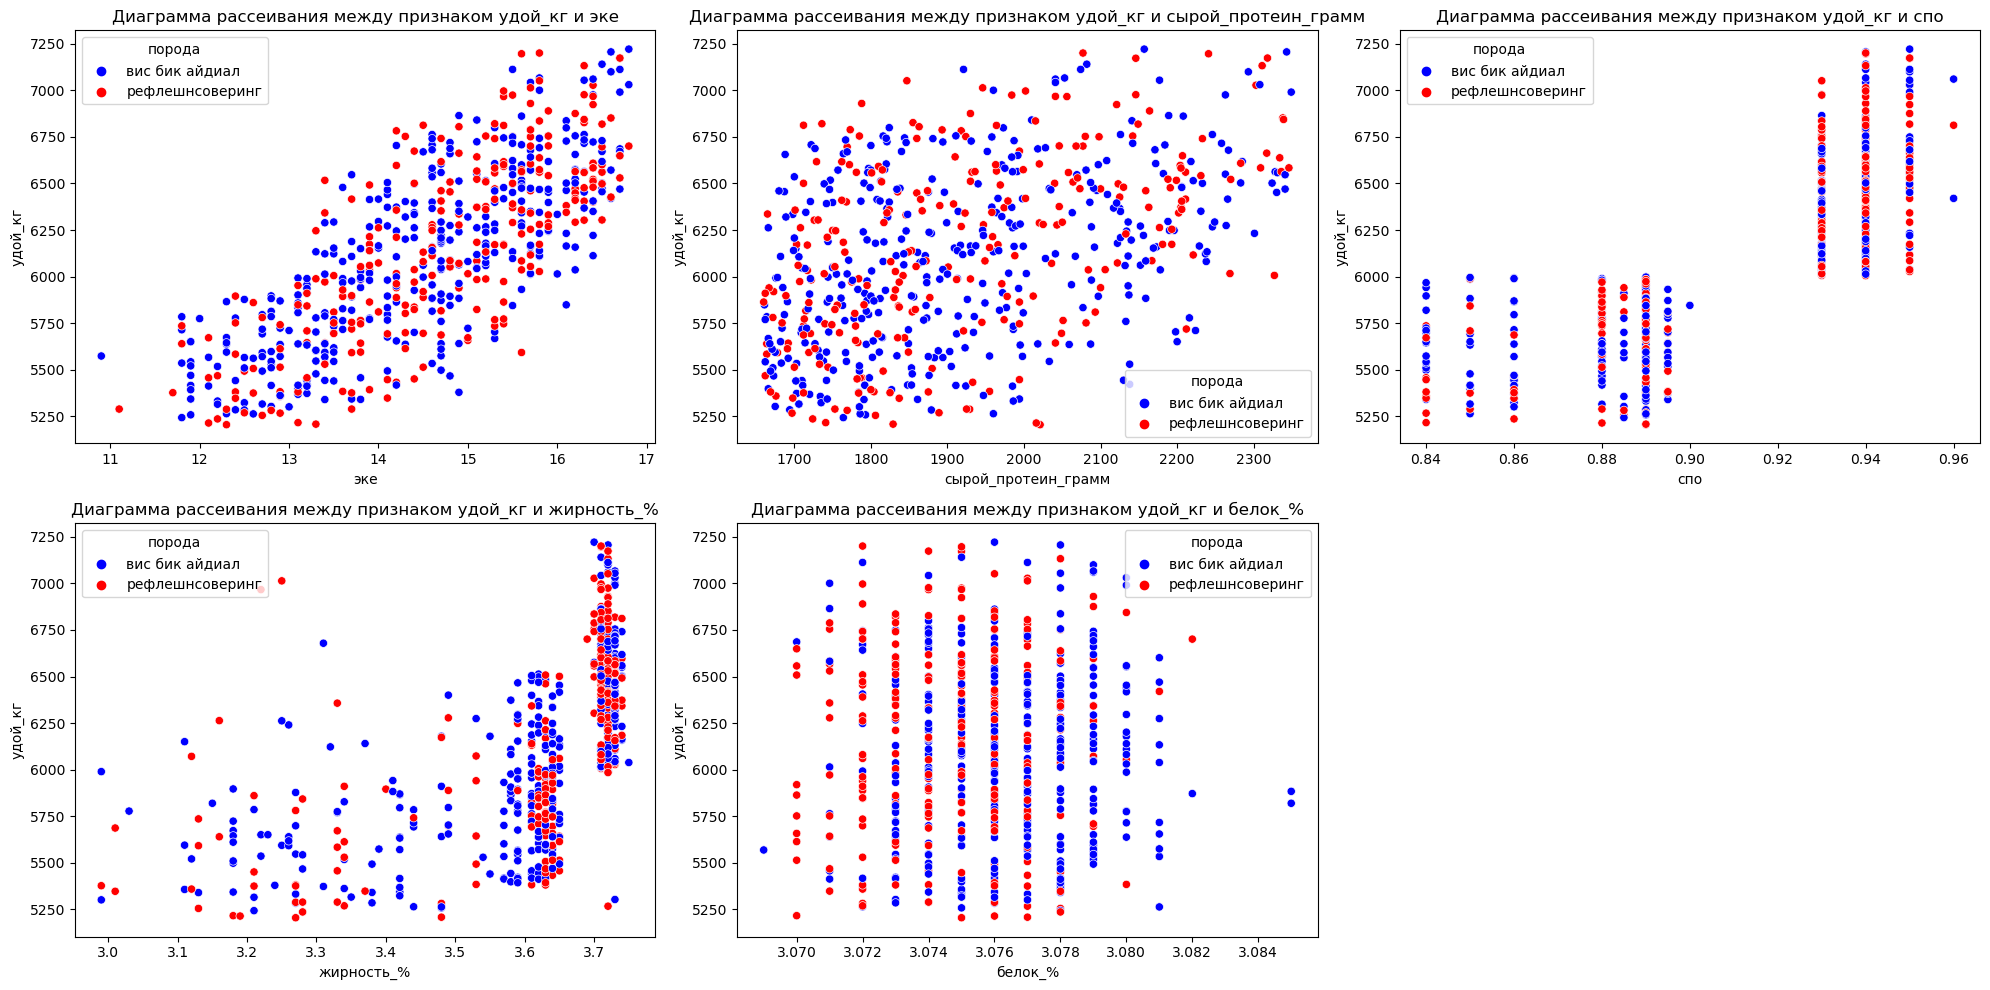

In [27]:
# Создадим список количественных признаков 
quantitative_array = ['эке', 'сырой_протеин_грамм', 'спо', 'жирность_%', 'белок_%']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(quantitative_array, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='порода', palette=['blue', 'red'])
    plt.title(f'Диаграмма рассеивания между признаком удой_кг и {feature}')

plt.tight_layout()
plt.show()

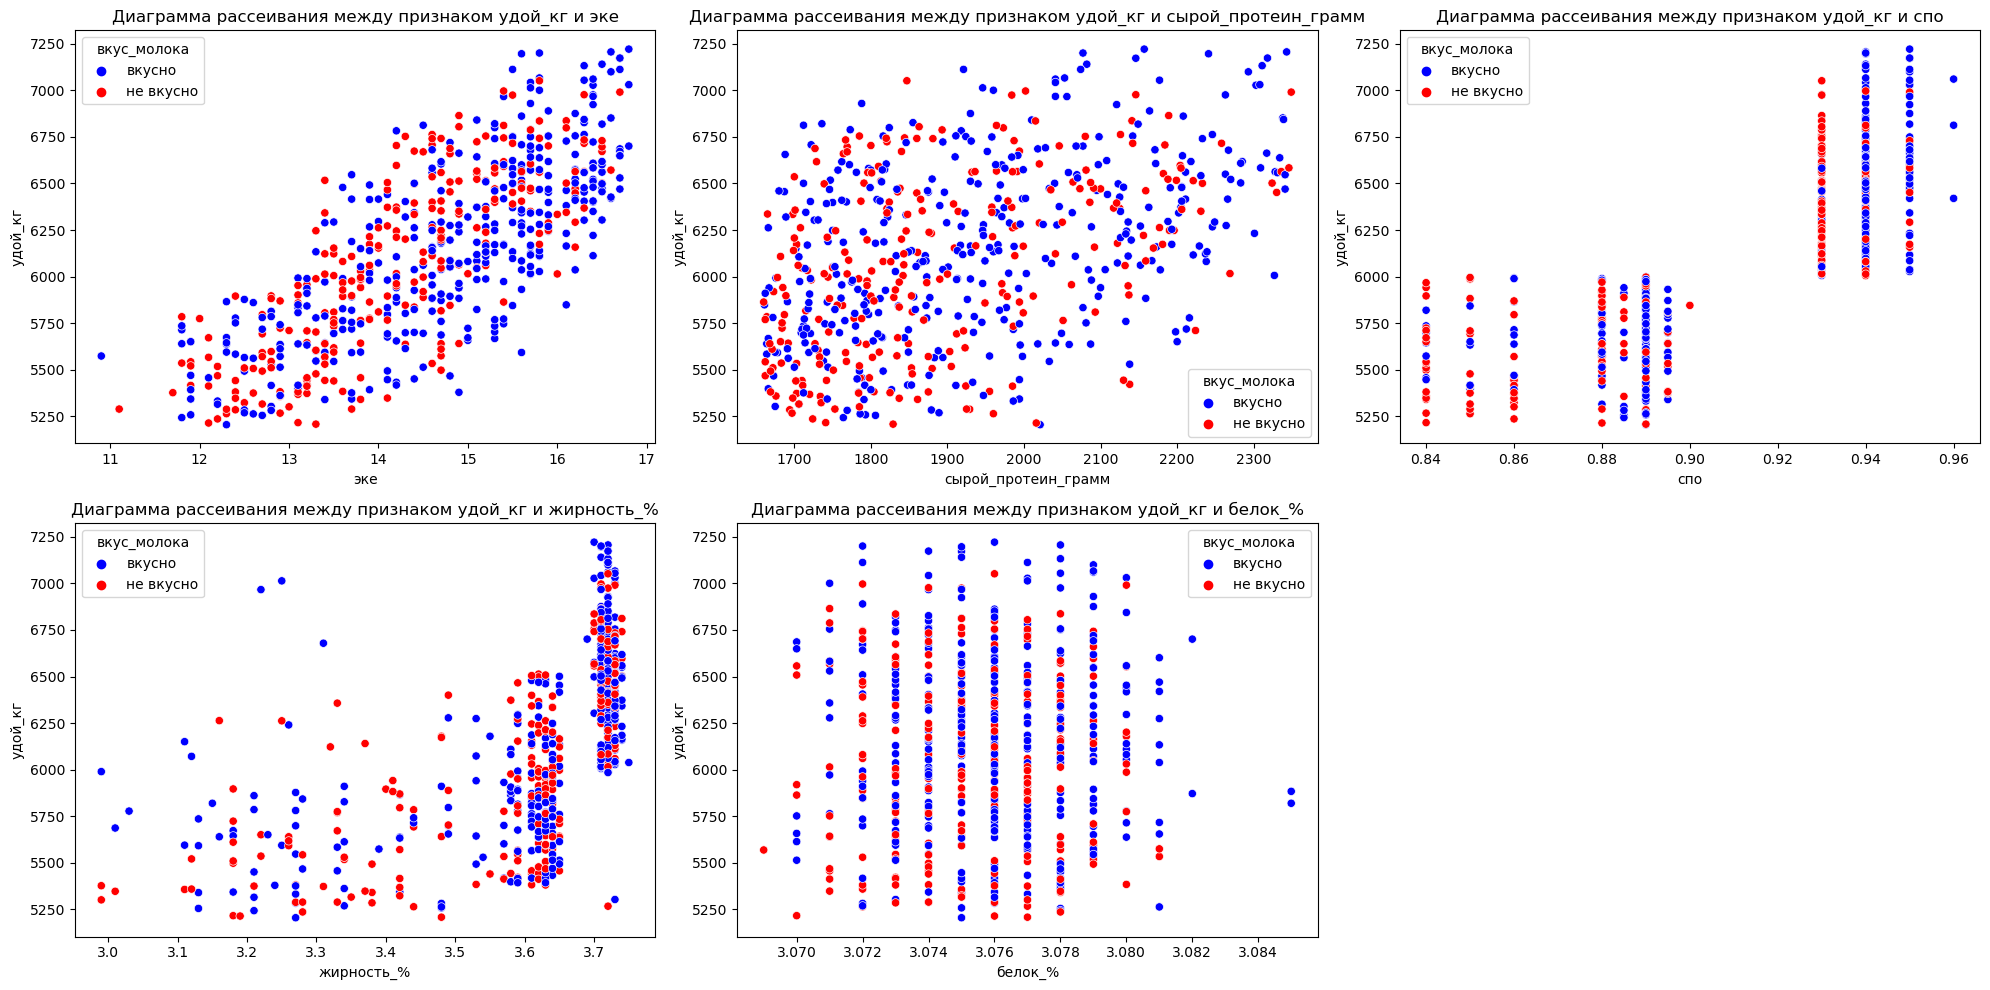

In [28]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(quantitative_array, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='вкус_молока', palette=['blue', 'red'])
    plt.title(f'Диаграмма рассеивания между признаком удой_кг и {feature}')

plt.tight_layout()
plt.show()

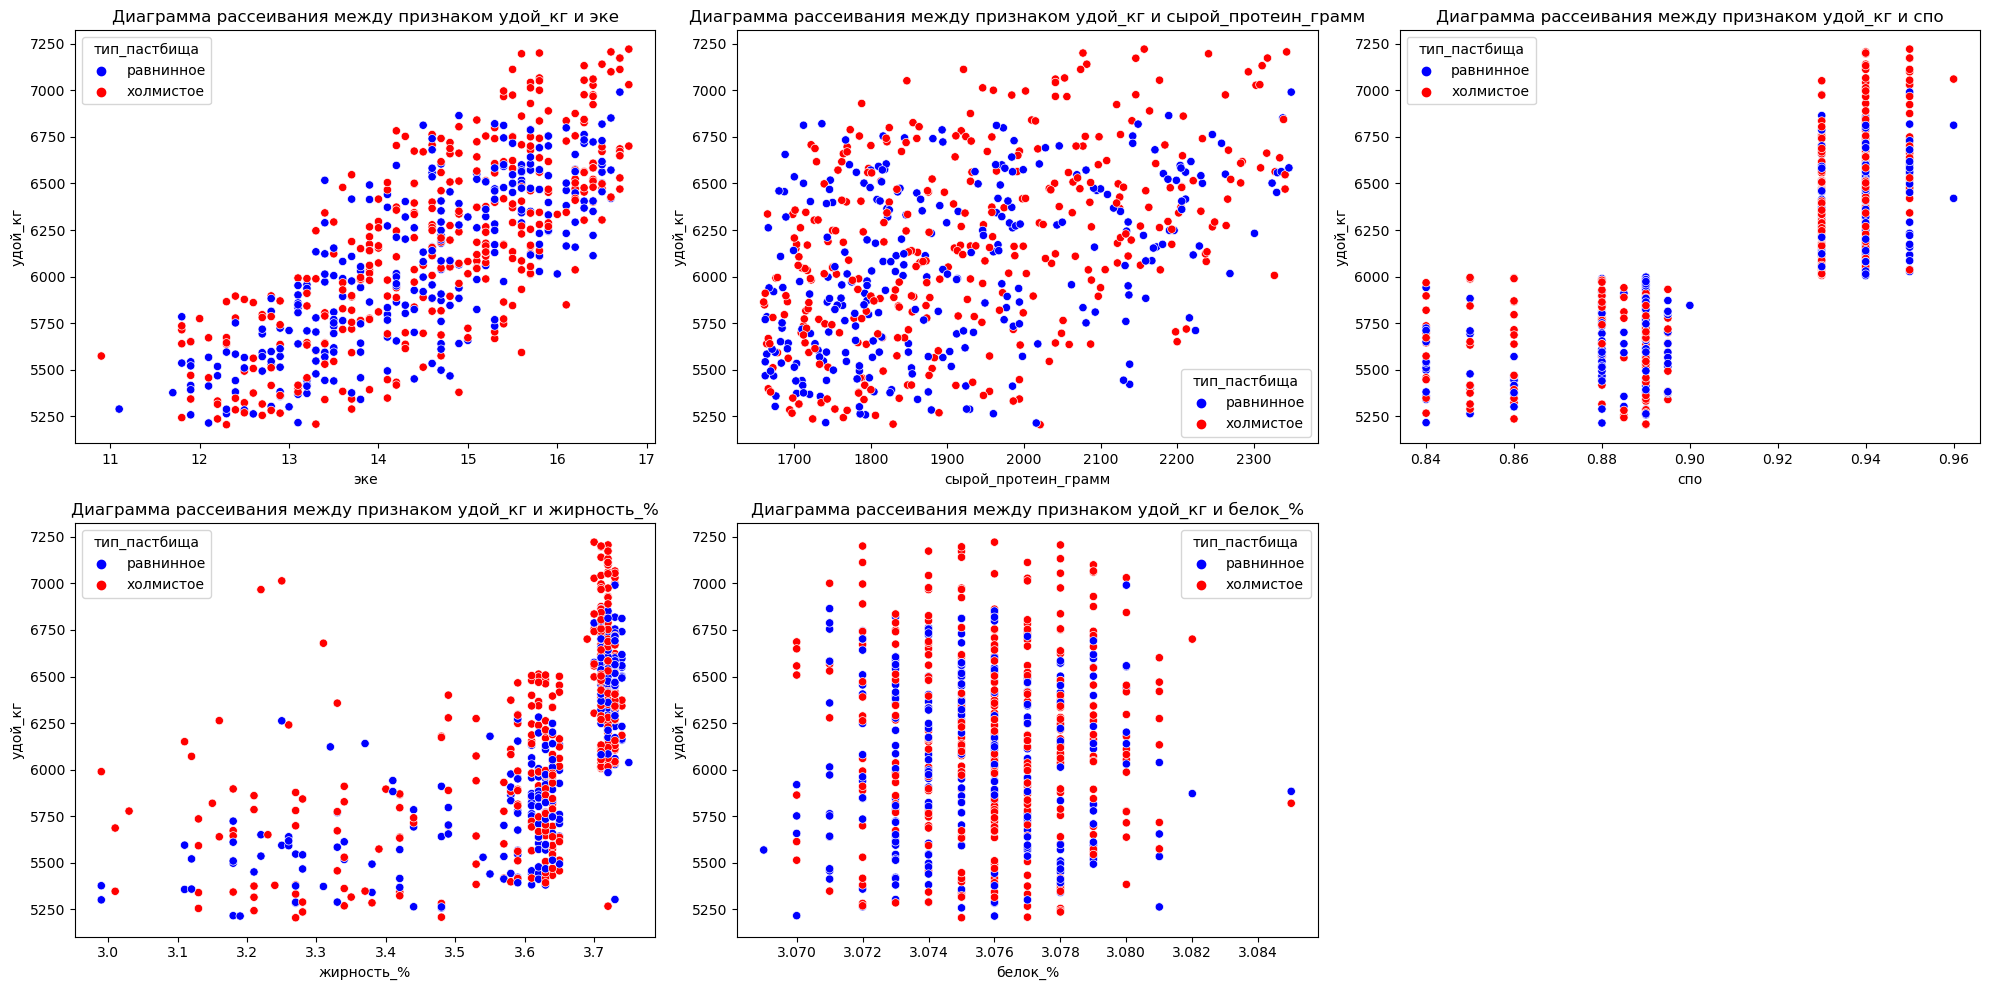

In [29]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(quantitative_array, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='тип_пастбища', palette=['blue', 'red'])
    plt.title(f'Диаграмма рассеивания между признаком удой_кг и {feature}')

plt.tight_layout()
plt.show()

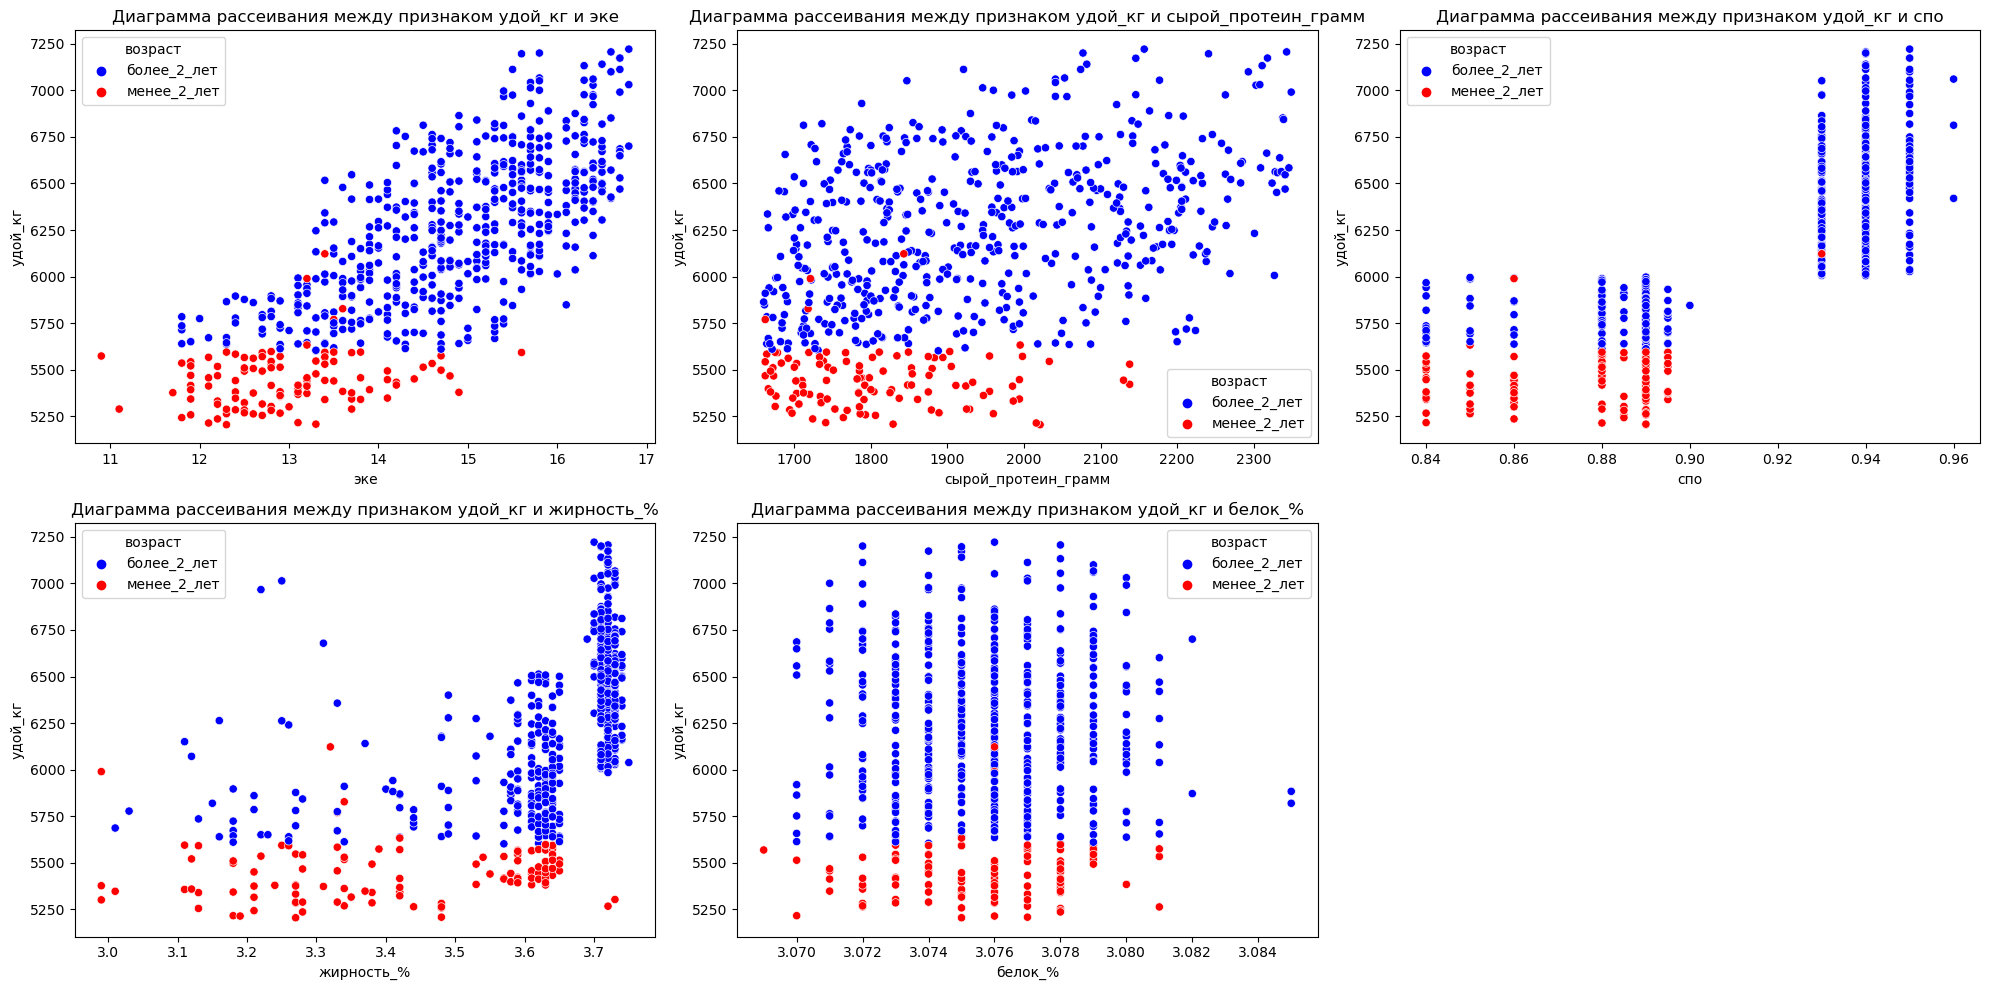

In [30]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(quantitative_array, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=feature, y='удой_кг', hue='возраст', palette=['blue', 'red'])
    plt.title(f'Диаграмма рассеивания между признаком удой_кг и {feature}')

plt.tight_layout()
plt.show()

<b>Диаграма рассеивания что признак "удой" коррелирует с прочими признаками по разному.</b>
- эке: Есть положительная корреляция данного признака с удоем, чем выше питательность корма тем больше удой молока.
- сырой_протеин_грамм: Имеется слабая корреляция данного признака с удоем молока, 0.45 единиц.
- спо: заметно группировка признака, видно наличие трех обособленных групп, также заметно что, чем выше данный показатель, тем больше удой молока.
- жирность: диаграмма рассеивания показала, данный признак можно разделить на три группы, группа коров дающие молоко от 3.1% до 3.5% и сильно варирующиеся по удою, группа коров которая дают стабильно жирное молоко 3.6-3.65% и имеют удой от 5500 кг до 6500 кг в год и последняя группа коров которая дает молоко с жиностью более 3.7% при это имея очень высокий удой, от 6000 до 7250 кг в год.
- белок_%: данный признак не имеет какой либо корреляции с продуктивностью коров и распределен по равномерно по всей оси координат.

<b>Взаимосвязь между количественными и категориальными признаками</b>
- Визуализация не показало приемущество какой либо из двух пород по удою и характеристикам молока. аналогично тип постбища не оказывает какого либо влияние на продуктивность.
- тем не менее, молодые коровы (менее 2 лет) дают молоко уступающая по всем показателям взрослым особям. Видимо начало продуктивности наступает после 2 лет. данный факт стоит учитывать при совершении контрактов.

## Обучение модели линейной регрессии

In [31]:
display(ferma_main.head(5))

,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


In [32]:
ferma_for_ml = ferma_main.drop(['id', 'белок_%', 'жирность_%'], axis=1)
display(ferma_for_ml.head(5))
print(ferma_for_ml.info())

,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,вкус_молока,возраст
0,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,вкусно,более_2_лет
1,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 628
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   удой_кг              628 non-null    int64  
 1   эке                  628 non-null    float64
 2   сырой_протеин_грамм  628 non-null    int64  
 3   спо                  628 non-null    float64
 4   порода               628 non-null    object 
 5   тип_пастбища         628 non-null    object 
 6   порода_папы          628 non-null    object 
 7   вкус_молока          628 non-null    object 
 8   возраст              628 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 49.1+ KB
None


Для оптимизации модели машинного обучания решено отказаться от признаков которые никак не коррелируют с целевым признаком (удой), следовательно стоит отказаться по признаков "белок_%", "жирность_%", и "id". 

<b>Первая модель</b>

In [33]:
RANDOM_STATE = 42

X = ferma_for_ml.drop('удой_кг', axis=1)
y = ferma_for_ml['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25, 
    random_state=RANDOM_STATE
)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

Данные были разделены на 4 части с целью начала обучения.

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),         # Масштабирование числовых
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)  # Кодирование категориальных
    ]
)
# Применяем fit_transform только к обучающим данным
X_train_processed = preprocessor.fit_transform(X_train)

# Применяем transform к тестовым (без fit!)
X_test_processed = preprocessor.transform(X_test)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Данный код масштабирует числовые и категориальные признаки, затем проходит процесс обучение на тренировочных данных. тестовые данные аналогично проходят процесс масштабирование, но не обучения.

In [35]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.795
RMSE: 204.19


- R² - модель хорошо себя показывает в 80% случаев.
- RMSE - модель в среднем ошибается на 204 кг по удою молока.

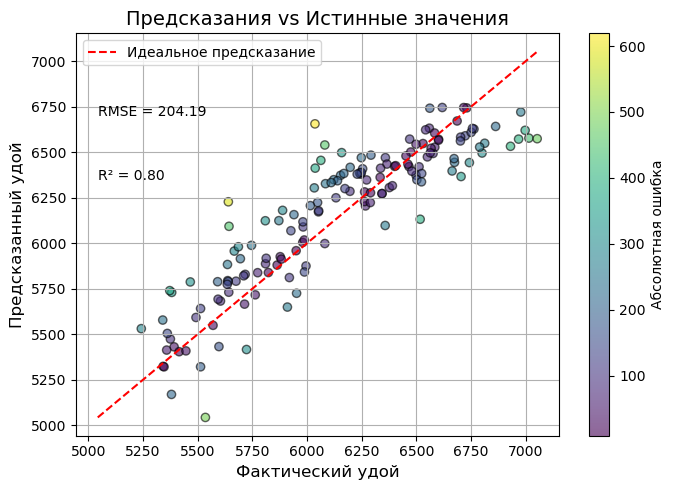

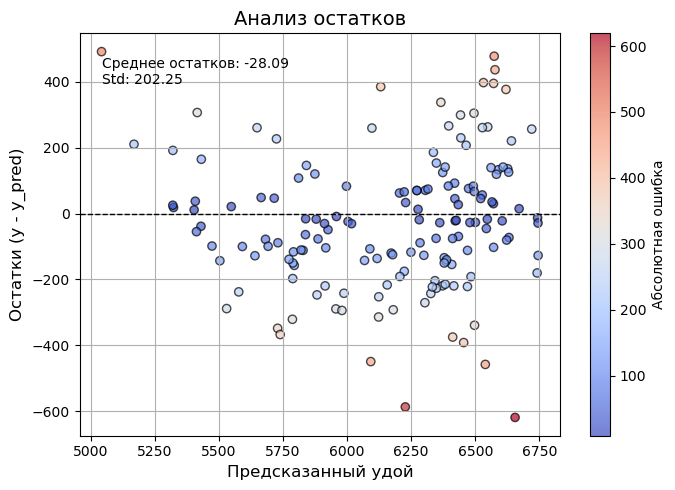

In [36]:
# Остатки и метрики
residuals = y_test - y_pred
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# График: Истинные vs Предсказанные
plt.figure(figsize=(7, 5))
sc = plt.scatter(y_test, y_pred, c=abs(residuals), cmap='viridis', alpha=0.6, edgecolors='k')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Идеальное предсказание')
plt.colorbar(sc, label='Абсолютная ошибка')

plt.xlabel("Фактический удой", fontsize=12)
plt.ylabel("Предсказанный удой", fontsize=12)
plt.title("Предсказания vs Истинные значения", fontsize=14)
plt.legend()
plt.grid(True)

# Подписи с метриками
plt.text(min_val, max_val * 0.95, f'RMSE = {rmse:.2f}', fontsize=10)
plt.text(min_val, max_val * 0.9, f'R² = {r2:.2f}', fontsize=10)

plt.tight_layout()
plt.show()


plt.figure(figsize=(7, 5))
sc = plt.scatter(y_pred, residuals, c=abs(residuals), cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.colorbar(sc, label='Абсолютная ошибка')

plt.xlabel("Предсказанный удой", fontsize=12)
plt.ylabel("Остатки (y - y_pred)", fontsize=12)
plt.title("Анализ остатков", fontsize=14)
plt.grid(True)

# Статистика остатков
plt.text(min(y_pred), max(residuals)*0.9, f'Среднее остатков: {np.mean(residuals):.2f}', fontsize=10)
plt.text(min(y_pred), max(residuals)*0.8, f'Std: {np.std(residuals):.2f}', fontsize=10)

plt.tight_layout()
plt.show()


Из графика анализа остатков понятно что первая модель ошибается по продуктивности коров на -28 кг, учитывая что среднее значение продуктивности 6188 кг в год, то получается что модель недооценивает продуктивность на 0.45%.

График остатков нормально распределен по всей площади. Стандартное отклонение остатков составило 202.2 кг удоя

<b>Вторая модель</b>

In [37]:
ferma_main_2 = ferma_main.copy(deep=True)
ferma_main_2['спо_кат'] = ferma_main_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)
display(ferma_main_2['спо_кат'].value_counts())
ferma_main_2['эке_в_квадрате'] = ferma_main_2['эке'] ** 2
display(ferma_main_2.head())

спо_кат
1    370
0    258
Name: count, dtype: int64

,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [38]:
# Убираем неважные столбцы
ferma_main_2 = ferma_main_2.drop(['id', 'белок_%', 'жирность_%', 'эке', 'спо'], axis=1)
ferma_main_2.head()

,удой_кг,сырой_протеин_грамм,порода,тип_пастбища,порода_папы,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,5863,1743,вис бик айдиал,равнинное,айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,0,163.84
2,5810,1854,рефлешнсоверинг,холмистое,соверин,не вкусно,более_2_лет,0,196.00
3,5895,2012,рефлешнсоверинг,холмистое,айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,0,163.84


In [39]:
RANDOM_STATE = 42

X = ferma_main_2.drop('удой_кг', axis=1)
y = ferma_main_2['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25, 
    random_state=RANDOM_STATE
)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),         # Масштабирование числовых
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)  # Кодирование категориальных
    ]
)
# Применяем fit_transform только к обучающим данным
X_train_processed = preprocessor.fit_transform(X_train)

# Применяем transform к тестовым (без fit!)
X_test_processed = preprocessor.transform(X_test)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
model = LinearRegression()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

r2_2 = r2_score(y_test, y_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)

print(f'R²: {r2_2:.3f}')
print(f'RMSE: {rmse2:.2f}')

R²: 0.820
RMSE: 191.37


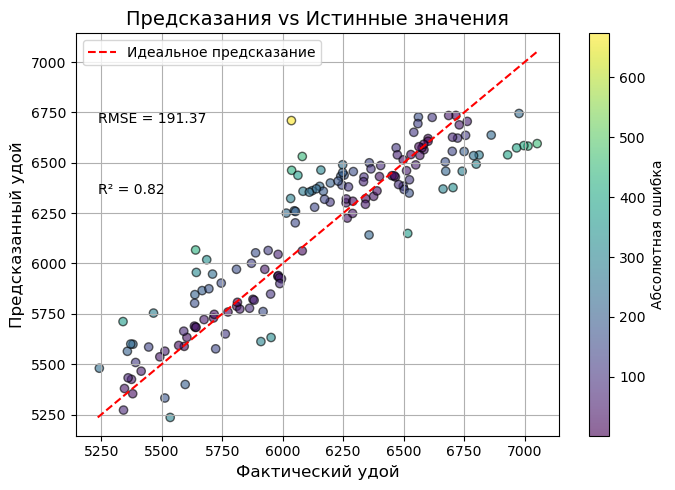

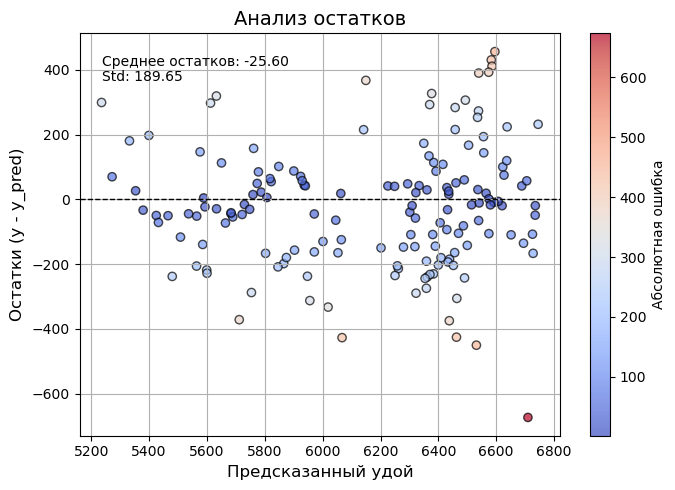

In [42]:
# Остатки и метрики
residuals2 = y_test - y_pred

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# График: Истинные vs Предсказанные
plt.figure(figsize=(7, 5))
sc = plt.scatter(y_test, y_pred, c=abs(residuals2), cmap='viridis', alpha=0.6, edgecolors='k')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Идеальное предсказание')
plt.colorbar(sc, label='Абсолютная ошибка')

plt.xlabel("Фактический удой", fontsize=12)
plt.ylabel("Предсказанный удой", fontsize=12)
plt.title("Предсказания vs Истинные значения", fontsize=14)
plt.legend()
plt.grid(True)

# Подписи с метриками
plt.text(min_val, max_val * 0.95, f'RMSE = {rmse2:.2f}', fontsize=10)
plt.text(min_val, max_val * 0.9, f'R² = {r2_2:.2f}', fontsize=10)

plt.tight_layout()
plt.show()


plt.figure(figsize=(7, 5))
sc = plt.scatter(y_pred, residuals2, c=abs(residuals2), cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.colorbar(sc, label='Абсолютная ошибка')

plt.xlabel("Предсказанный удой", fontsize=12)
plt.ylabel("Остатки (y - y_pred)", fontsize=12)
plt.title("Анализ остатков", fontsize=14)
plt.grid(True)

# Статистика остатков
plt.text(min(y_pred), max(residuals2)*0.9, f'Среднее остатков: {np.mean(residuals2):.2f}', fontsize=10)
plt.text(min(y_pred), max(residuals2)*0.8, f'Std: {np.std(residuals2):.2f}', fontsize=10)

plt.tight_layout()
plt.show()


Внесение дополнительных настроек с данными пологло модели стать более точной в прогнозах.
Из графика анализа остатков понятно что вторая модель ошибается по продуктивности коров на -25.6 кг, учитывая что среднее значение продуктивности 6188 кг в год, то получается что модель недооценивает продуктивность на 0.41%. В целом модель стала выдавать правильные ответы в 82% случаев против 79.5% в первой модели. 

График остатков нормально распределен по всей площади. Стандартное отклонение остаток стало 189 кг против 204 в первой модели. 

<b>Третья модель</b>

In [43]:
ferma_3 = ferma_main.merge(ferma_dad, on='id')
ferma_3['спо_кат'] = ferma_3['спо'].apply(lambda x: 1 if x > 0.91 else 0)
display(ferma_3['спо_кат'].value_counts())
ferma_3['эке_в_квадрате'] = ferma_3['эке'] ** 2
display(ferma_3.head())
print('Пропуски', ferma_3.isnull().sum())
print('Дубликатов:', ferma_3.duplicated().sum())

спо_кат
1    370
0    258
Name: count, dtype: int64

,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст,имя_папы,спо_кат,эке_в_квадрате
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0,163.84
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0,196.00
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,0,153.76
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,Барин,0,163.84


Пропуски id                     0
удой_кг                0
эке                    0
сырой_протеин_грамм    0
спо                    0
порода                 0
тип_пастбища           0
порода_папы            0
жирность_%             0
белок_%                0
вкус_молока            0
возраст                0
имя_папы               0
спо_кат                0
эке_в_квадрате         0
dtype: int64
Дубликатов: 0


In [44]:
ferma_3 = ferma_3.drop(['id', 'белок_%', 'жирность_%', 'эке', 'спо'], axis=1)
ferma_3.head()

,удой_кг,сырой_протеин_грамм,порода,тип_пастбища,порода_папы,вкус_молока,возраст,имя_папы,спо_кат,эке_в_квадрате
0,5863,1743,вис бик айдиал,равнинное,айдиал,вкусно,более_2_лет,Буйный,0,201.64
1,5529,2138,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,Соловчик,0,163.84
2,5810,1854,рефлешнсоверинг,холмистое,соверин,не вкусно,более_2_лет,Барин,0,196.00
3,5895,2012,рефлешнсоверинг,холмистое,айдиал,не вкусно,более_2_лет,Буйный,0,153.76
4,5302,1675,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,Барин,0,163.84


In [45]:
RANDOM_STATE = 42

X = ferma_3.drop('удой_кг', axis=1)
y = ferma_3['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25, 
    random_state=RANDOM_STATE
)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [46]:
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),         # Масштабирование числовых
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)  # Кодирование категориальных
    ]
)
# Применяем fit_transform только к обучающим данным
X_train_processed = preprocessor.fit_transform(X_train)

# Применяем transform к тестовым (без fit!)
X_test_processed = preprocessor.transform(X_test)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
model = LinearRegression()
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
r2_3 = r2_score(y_test, y_pred)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
mae3 = mean_absolute_error(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
print(f'R²: {r2_3:.3f}')
print(f'RMSE: {rmse3:.2f}')

R²: 0.826
RMSE: 188.05


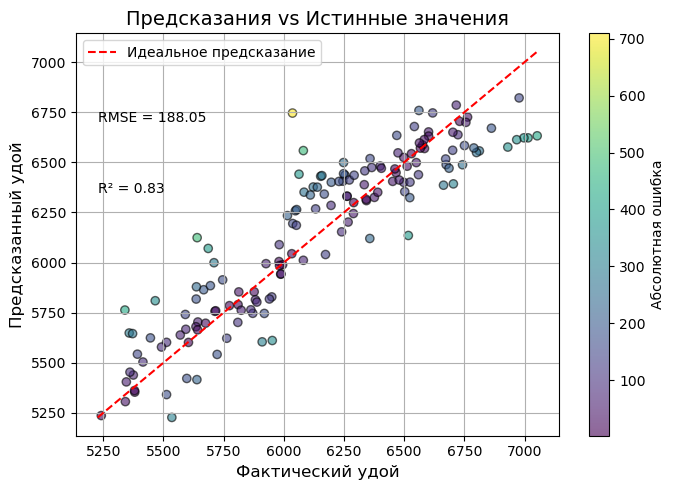

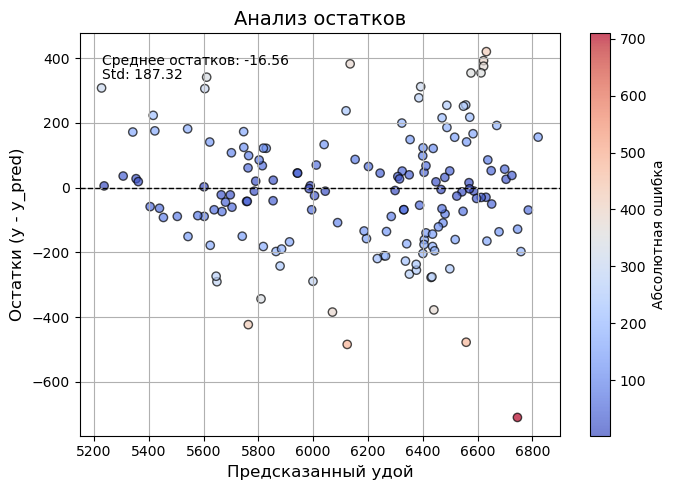

In [49]:
# Остатки и метрики
residuals3 = y_test - y_pred
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# График: Истинные vs Предсказанные
plt.figure(figsize=(7, 5))
sc = plt.scatter(y_test, y_pred, c=abs(residuals3), cmap='viridis', alpha=0.6, edgecolors='k')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Идеальное предсказание')
plt.colorbar(sc, label='Абсолютная ошибка')

plt.xlabel("Фактический удой", fontsize=12)
plt.ylabel("Предсказанный удой", fontsize=12)
plt.title("Предсказания vs Истинные значения", fontsize=14)
plt.legend()
plt.grid(True)

# Подписи с метриками
plt.text(min_val, max_val * 0.95, f'RMSE = {rmse3:.2f}', fontsize=10)
plt.text(min_val, max_val * 0.9, f'R² = {r2_3:.2f}', fontsize=10)

plt.tight_layout()
plt.show()


plt.figure(figsize=(7, 5))
sc = plt.scatter(y_pred, residuals3, c=abs(residuals3), cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.colorbar(sc, label='Абсолютная ошибка')

plt.xlabel("Предсказанный удой", fontsize=12)
plt.ylabel("Остатки (y - y_pred)", fontsize=12)
plt.title("Анализ остатков", fontsize=14)
plt.grid(True)

# Статистика остатков
plt.text(min(y_pred), max(residuals3)*0.9, f'Среднее остатков: {np.mean(residuals3):.2f}', fontsize=10)
plt.text(min(y_pred), max(residuals3)*0.8, f'Std: {np.std(residuals3):.2f}', fontsize=10)

plt.tight_layout()
plt.show()

Третья модель показала себя наиболее перспективной, добавив столбец "Имя папы" и проведя обучение по схеме второй модели получилось минимизировать ошибки обучения.
Модель прогнозирует удой правильно в R²: 82.6% случаев.
RMSE - модель в среднем ошибается на 188 кг по удою молока.
Среднее значение остатков - (минус 16.5 кг) то есть модель недобирает 0.27% по удою.
График остатков нормально распределен по всей площади. Стандартное отклонение остаток стало 187 кг против 204 в первой модели. 

In [50]:
# Сравнение r2_score
scores_compared = {'первой': r2, 'второй': r2_2, 'третьей': r2_3}
for k, v in scores_compared.items():
    print(f'R2_score {k} модели: {v}')

print('---')

# Сравнение остатков
residuals_compared = {'первой': residuals, 'второй': residuals2, 'третьей': residuals3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean()}')

R2_score первой модели: 0.795175798065282
R2_score второй модели: 0.820097367718629
R2_score третьей модели: 0.8262863382397995
---
Среднее значение остатков первой модели: -28.09067524921225
Среднее значение остатков второй модели: -25.601566488466776
Среднее значение остатков третьей модели: -16.559109848716442


Сравнительный анализ трех версий показал что наиболее точной является третья модель, она выдает предсказание с вероятностью 82.6% и ошибается по удою на 16 кг.

In [51]:
def evaluate_models(mse_vals, rmse_vals, mae_vals, labels=('первой', 'второй', 'третьей')):
    print('📊 Сравнение моделей по метрикам:\n')

    print('MSE:')
    for label, val in zip(labels, mse_vals):
        print(f'  {label.capitalize()} модель: {val:.4f}')
    
    print('---\nRMSE:')
    for label, val in zip(labels, rmse_vals):
        print(f'  {label.capitalize()} модель: {val:.4f}')
    
    print('---\nMAE:')
    for label, val in zip(labels, mae_vals):
        print(f'  {label.capitalize()} модель: {val:.4f}')

    print('\n✅ Лучшая модель по RMSE:', labels[np.argmin(rmse_vals)].capitalize())
    
evaluate_models(
    mse_vals=[mse, mse2, mse3],
    rmse_vals=[rmse, rmse2, rmse3],
    mae_vals=[mae, mae2, mae3]
)

📊 Сравнение моделей по метрикам:

MSE:
  Первой модель: 41695.0314
  Второй модель: 36621.8730
  Третьей модель: 35362.0154
---
RMSE:
  Первой модель: 204.1936
  Второй модель: 191.3684
  Третьей модель: 188.0479
---
MAE:
  Первой модель: 160.8731
  Второй модель: 147.7794
  Третьей модель: 144.7145

✅ Лучшая модель по RMSE: Третьей


Значение метрик MAE, RMSE и MSE показа что третья версия модели показала себя лучше в сравнении с двумя другими. Поэтому ее модель предпочтительна для предсказания удоя коров.

In [52]:
predictions = y_pred 

# Расчёт доверительного интервала
conf_int = st.norm.interval(
    confidence=0.9, 
    loc=np.mean(predictions), 
    scale=st.sem(predictions)  # стандартная ошибка среднего
)
print('90% доверительный интервал:', conf_int)

90% доверительный интервал: (6103.9663230195165, 6212.463998588744)


<b>Модель для прогноза удоя (4 модель)</b>

In [53]:
# Создаем копию датасета
cow_buy_ml = cow_buy.copy(deep=True)

v = ferma_main[['эке', 'сырой_протеин_грамм', 'спо']].mean() * 1.05
cow_buy_ml = cow_buy.assign(
    сырой_протеин_грамм=v['сырой_протеин_грамм'],
    эке=v['эке'],
    эке_в_квадрате=v['эке'] ** 2,
    спо=v['спо'],
    спо_кат=int(v['спо'] > 0.91)
)

# Форматируем cow_buy
cow_buy_ml = cow_buy_ml.drop(['эке', 'спо'], axis=1)
X_train_full = X_train_full.drop('вкус_молока', axis=1)

# Проверка
display(cow_buy_ml.head())
display(X_train_full.head())

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,сырой_протеин_грамм,эке_в_квадрате,спо_кат
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,2019.947532,233.361138,1
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,2019.947532,233.361138,1
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,2019.947532,233.361138,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,2019.947532,233.361138,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,2019.947532,233.361138,1


,сырой_протеин_грамм,порода,тип_пастбища,порода_папы,возраст,имя_папы,спо_кат,эке_в_квадрате
0,2123,рефлешнсоверинг,холмистое,соверин,более_2_лет,Соловчик,1,272.25
1,1889,рефлешнсоверинг,холмистое,соверин,менее_2_лет,Барин,0,156.25
2,1671,вис бик айдиал,равнинное,айдиал,более_2_лет,Буйный,0,216.09
3,2063,вис бик айдиал,холмистое,айдиал,более_2_лет,Буйный,1,207.36
4,2077,вис бик айдиал,равнинное,айдиал,более_2_лет,Геркулес,0,171.61


In [54]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_грамм']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml[num_col_names])
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
final_reg = LogisticRegression()
final_reg.fit(X_train_full, y_train_full)
pred = final_reg.predict(X_test_full)

In [56]:
cow_buy['ожидаемый_удой'] = pred
display(cow_buy.head(20))

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,ожидаемый_удой
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6081
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6248
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6173
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6173
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6601
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6564
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6248
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6173
10,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,6122
11,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,6173


Был добавлен столбец показывающий ожидаемый удой коров которых хочет купить фермер предсказание было сделано на основании лучшей (третьей модели).

## Обучение модели логистической регрессии

<b>Логистическая регрессия</b>

In [57]:
ferma_logistics = ferma_main.copy(deep=True)

ferma_logistics['вкус_молока'] = ferma_logistics['вкус_молока'].apply(lambda x: 1 if x== 'вкусно' else 0)
ferma_logistics['спо_кат'] = ferma_logistics['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_logistics['эке_в_квадрате'] = ferma_logistics['эке'] ** 2

display(ferma_logistics.head())

,id,удой_кг,эке,сырой_протеин_грамм,спо,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,менее_2_лет,0,163.84


In [58]:
ferma_logistics = ferma_logistics.drop(['id', 'белок_%', 'жирность_%', 'эке', 'спо'], axis=1)
ferma_logistics.head()

,удой_кг,сырой_протеин_грамм,порода,тип_пастбища,порода_папы,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,5863,1743,вис бик айдиал,равнинное,айдиал,1,более_2_лет,0,201.64
1,5529,2138,вис бик айдиал,равнинное,соверин,1,менее_2_лет,0,163.84
2,5810,1854,рефлешнсоверинг,холмистое,соверин,0,более_2_лет,0,196.00
3,5895,2012,рефлешнсоверинг,холмистое,айдиал,0,более_2_лет,0,153.76
4,5302,1675,вис бик айдиал,равнинное,соверин,1,менее_2_лет,0,163.84


In [59]:
RANDOM_STATE = 42

X = ferma_logistics.drop('вкус_молока', axis=1)
y = ferma_logistics['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25, 
    random_state=RANDOM_STATE
)
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(X_train_full.head())

   удой_кг  сырой_протеин_грамм           порода тип_пастбища порода_папы  \
0     6498                 2123  рефлешнсоверинг    холмистое     соверин   
1     5268                 1889  рефлешнсоверинг    холмистое     соверин   
2     5610                 1671   вис бик айдиал    равнинное      айдиал   
3     6343                 2063   вис бик айдиал    холмистое      айдиал   
4     5833                 2077   вис бик айдиал    равнинное      айдиал   

       возраст  спо_кат  эке_в_квадрате  
0  более_2_лет        1          272.25  
1  менее_2_лет        0          156.25  
2  более_2_лет        0          216.09  
3  более_2_лет        1          207.36  
4  более_2_лет        0          171.61  


In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),         # Масштабирование числовых
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)  # Кодирование категориальных
    ]
)
# Применяем fit_transform только к обучающим данным
X_train_processed = preprocessor.fit_transform(X_train)

# Применяем transform к тестовым (без fit!)
X_test_processed = preprocessor.transform(X_test)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
clf.fit(X_train_processed, y_train)
y_pred = clf.predict(X_test_processed)

clf_accuracy = accuracy_score(y_pred, y_test)
clf_recall = recall_score(y_pred, y_test)
clf_precision = precision_score(y_pred, y_test)

print(f'Accuracy: {clf_accuracy} — модель в целом верна в 61% случаев')
print(f'Recall: {clf_recall} — из всех "вкусных" коров правильно выбрали 61%')
print(f'Precision: {clf_precision} — из всех выбранных "вкусных" коров 84% действительно вкусные')

Accuracy: 0.6114649681528662 — модель в целом верна в 61% случаев
Recall: 0.6115702479338843 — из всех "вкусных" коров правильно выбрали 61%
Precision: 0.8409090909090909 — из всех выбранных "вкусных" коров 84% действительно вкусные


<b>Цель заказчика: выбрать коров с вкусным молоком</b>
- То есть, модель должна выбирать только тех, кто точно даёт вкусное молоко
- <b>Ошибка в выборе "невкусной" коровы как "вкусной" — хуже, чем наоборот</b>

- Положительный класс (1) — корова с вкусным молоком
- Отрицательный класс (0) — корова с обычным или невкусным молоком
- Ошибка первого рода (False Positive): Корову с невкусным молоком модель ошибочно предсказала как "вкусную". Эта ошибка хуже для заказчика, потому что он купит плохую корову и разочаруется.

<b>Ошибка второго рода (False Negative):</b>
Корову с вкусным молоком модель отбраковала как "невкусную". Менее критично: такую корову не купят, но и не испортят продукт.

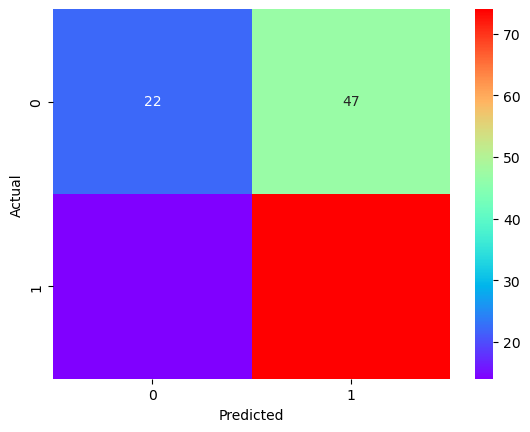

In [62]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow')
plt.ylabel('Actual')
plt.xlabel('Predicted');

- <b>TP (True Positive) - 74 - Вкусная корова предсказана как вкусная</b> 
- <b>TN (True Negative) - 22 - Невкусная корова предсказана как невкусная</b> 
- <b>FP (False Positive) - 47 - Невкусная корова предсказана как вкусная (ошибка первого рода)</b> 
- <b>FN (False Negative) - 14 - Вкусная корова предсказана как невкусная (ошибка второго рода)</b> 

In [63]:
y_proba = clf.predict_proba(X_test_processed)[:, 1]
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    prec = precision_score(y_test, y_pred_t)
    rec = recall_score(y_test, y_pred_t)
    print(f'Порог: {t} | Precision: {prec:.3f} | Recall: {rec:.3f}')

Порог: 0.5 | Precision: 0.612 | Recall: 0.841
Порог: 0.6 | Precision: 0.714 | Recall: 0.682
Порог: 0.7 | Precision: 0.864 | Recall: 0.432
Порог: 0.8 | Precision: 0.889 | Recall: 0.091
Порог: 0.9 | Precision: 0.000 | Recall: 0.000


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Оптимальным порогом в данном случае стоит выбрать значение 0.7. Он дает нам возможность подобрать максимальное количество коров с минимальными рисками купить плохой товар.

In [64]:
# 1. Получаем вероятности принадлежности к классу 1 (вкусное молоко)
#y_proba = clf.predict_proba(X_test_processed)[:, 1]

# 2. Устанавливаем новый порог
threshold = 0.7
y_pred_new = (y_proba >= threshold).astype(int)

# 3. Новые метрики
new_precision = precision_score(y_test, y_pred_new)
new_recall = recall_score(y_test, y_pred_new)

print(f'Новый порог: {threshold}')
print(f'Новая точность (Precision): {new_precision:.3f}')
print(f'Новая полнота (Recall): {new_recall:.3f}')

Новый порог: 0.7
Новая точность (Precision): 0.864
Новая полнота (Recall): 0.432


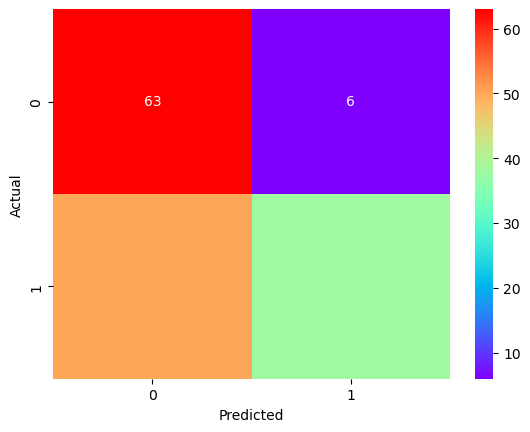

In [65]:
cm = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow')
plt.ylabel('Actual')
plt.xlabel('Predicted');

- <b>TP (True Positive) - 38 - Вкусная корова предсказана как вкусная</b> 
- <b>TN (True Negative) - 63 - Невкусная корова предсказана как невкусная</b> 
- <b>FP (False Positive) - 6 - Невкусная корова предсказана как вкусная (ошибка первого рода)</b> 
- <b>FN (False Negative) - 50 - Вкусная корова предсказана как невкусная (ошибка второго рода)</b> 

Задав порог в 0.7 мы получили модель которая минимизировала вероятность выбрать плохую корову.

In [66]:
cow_buy_ml = cow_buy.copy(deep=True)
cow_buy_ml['эке'] = v['эке']
cow_buy_ml['эке_в_квадрате'] = cow_buy_ml['эке'] ** 2
cow_buy_ml['сырой_протеин_грамм'] = v['сырой_протеин_грамм']
cow_buy_ml['спо'] = v['спо']
cow_buy_ml['спо_кат'] = cow_buy_ml['спо'].apply(lambda x: 1 if x > 0.91 else 0)
cow_buy_ml.rename(columns={'ожидаемый_удой': 'удой_кг', }, inplace=True)
# Удалим неиспользуемые признаки (если они были удалены и в обучении)
display(cow_buy_ml.head())

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,удой_кг,эке,эке_в_квадрате,сырой_протеин_грамм,спо,спо_кат
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6081,15.276162,233.361138,2019.947532,0.958744,1
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6248,15.276162,233.361138,2019.947532,0.958744,1
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6173,15.276162,233.361138,2019.947532,0.958744,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6173,15.276162,233.361138,2019.947532,0.958744,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6601,15.276162,233.361138,2019.947532,0.958744,1


In [67]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_грамм']

encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > threshold).astype(int)


cow_buy['ожидаемый_вкус_молока'] = predictions_final
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = cow_buy.query('ожидаемый_вкус_молока == "вкусно"')
cow_buy

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

Получен список с коровами и их ожидаемым удоем который не ниже 6 тыс кг в год. Предсказано качество молока по вкусовым качествам. Найдено 5 коров чей удой выше 6 тыс кг в год с минимальными рисками получить не вкусное молоко.

## Итоговые выводы

- Был проведен анализ первичных данных, установлено наличие аномальных значений и дубликатов, которые были удалены для оптимизации анализа данных и МО. 
- Проведен статистический анализ данных с визуализацией, для категориальных данных был проведен анализ соотношений.
- Проведен коррелиационный анализ категориальных и количественных признаков. Установлены признаки которые коррелируют с продуктивностью (удой кг) коров (ЭКЕ и сырой протеин). Установлены признаки которые мало коррелируют с продуктивностью (СПО и белок).

<b>Линейная регрессия</b>
- Созданы три модели линейной регрессии
 1) Обучение по всем доступным признакам, без удаление признаков которые не имеют связи с продуктивностью коров.
 2) Перевод признака СПО в категориальный признак, где если значение выше 0.91 он становится 1, если ниже то 0. Признак ЭКЕ, возведение значение в квадрат (эке в квадрате). Удаление признаков которые слабо влияют на обучение ('id', 'белок_%', 'жирность_%', 'эке', 'спо')
 3) Действия аналогично второй модели (выше) + добавление признака "имя_папы"
 4) Анализ значений трех моделей, выявление лучшей из них по таким метрикам как R², residuals, MAE, MSE, RMSE. 
- По настройкам лучшей модели (третьей) предсказание продуктивности коров интересующие фермера.

<b>Логистическая регрессия</b>
- Перевод категориального признака (вкус молока) в удобное для МО формат. Возведение признаков СПО с категориальный. Возведение признака ЭКЕ в квадрат. Удаление признаков не влияющие на результат обучения ('id', 'белок_%', 'жирность_%', 'эке', 'спо').
- Анализ значений метрик логистической регрессии: Accuracy, Recall, Precision.
- Выявление оптимального порога для минимизации ошибки.
- Обучение модели МО для предсказания вкусовых качеств молока коров которые фермер хочет купить. 

Выявлено 5 коров чей удой выше 6 тыс кг в год с вкусным молоком.